In [1]:
import stlib as st
import numpy as np

import matplotlib.pyplot as plt

import asyncio

In [2]:
ww = st.Worker()

In [68]:
pt = st.SpiralAboutCenter(150,50, num_revolutions=0.5)

In [69]:
pt.create()

In [70]:
pt.pts

array([[150.        ,   0.        ],
       [ 50.        ,   3.14159265]])

In [71]:
pt.positions = np.zeros_like(pt.pts)
pt.positions[:,0] = pt.pts[:,0]*pt.RADIUS_STEPS_MM
pt.positions[:,1] = pt.pts[:,1]*pt.ANGLE_STEPS_RAD
pt.positions = pt.positions.astype(np.int32)
pt.positions

array([[12272,     0],
       [ 4090, 13100]], dtype=int32)

In [72]:
pt.positions

array([[12272,     0],
       [ 4090, 13100]], dtype=int32)

In [5]:
ww.com.serial.in_waiting

0

In [ ]:
ww.start_worker()

Started workers


sent toggle
send toggle msg
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'
Got PathMaker
finished task
finished a move
b'f'
finished a move
b'f'


In [7]:
msg = {"msg":"t", "val":0}
ww.add_msg(msg)

sent msg


In [58]:
pt.positions

array([[    0,     0],
       [12272, 65500]], dtype=int32)

In [67]:
126000005/4200/2

15000.000595238096

In [66]:
int(126000005).to_bytes(4, "big", signed=True)

b'\x07\x82\x9b\x85'

In [4]:
import numpy as np

In [5]:
np.ceil(0.7)

np.float64(1.0)

In [73]:
ww.add_PathMaker(pt)

Added to queue


In [ ]:
ww.end_workers()

In [31]:
rec = ww.com.serial.read_all()
rec

b'ff'

In [4]:
HEADER = b"ab"
POSITION_MSG = b"c"
UPDATE_SPEED = b"d"
TOGGLE_MSG = b"e"
FINISH_MOVE = b"f"


In [42]:
pos = next(pt)
pos

ValueError: Object has not been initialized!

In [29]:

r = 7000
phi = 35000

pos_r = r.to_bytes(4, "big", signed=True)
pos_phi = phi.to_bytes(4, "big", signed=True)

msg = HEADER + POSITION_MSG + pos_r + pos_phi

ww.com.serial.write(msg)

11

In [28]:
msg = HEADER + TOGGLE_MSG

ww.com.serial.write(msg)

3

11

In [7]:
ww.start_worker()

<coroutine object Worker.start_worker at 0x00000248D51329B0>

In [4]:
sp = st.SpiralAboutCenter(r0=0, r1=50, num_revolutions=5)

In [8]:
msg = {"msg":"t", "val":0}

In [9]:
ww.add_msg(msg)

<coroutine object Worker.add_msg at 0x00000248EC405630>

In [10]:
ww.add_PathMaker(pt)

<coroutine object Worker.add_PathMaker at 0x00000248EC406400>

In [9]:
test = bytearray(b"abc")

In [10]:
test

bytearray(b'abc')

In [11]:
test[0] = test[1]

In [14]:
test == b"bbc"

True

In [2]:
pts = np.array([[10, 20, 30], [5, -10, 30]]).T

In [3]:
pm = st.PathMaker(pts, eps=1)

In [4]:
sp = st.SpiralAboutCenter(r0 = 0, r1 = 240, num_revolutions=25)

In [5]:
async def add_item(item: st.PathMaker, q: asyncio.Queue):
    await q.put(item)

async def worker(q: asyncio.Queue):
    while True:
        try:
            pm = await q.get()

            for val in pm:
                print(val)
                await asyncio.sleep(1)
            
            q.task_done()
        except Exception as e:
            print(f"Fail: {e}")
            q.task_done()
            

def start_background_loop(q: asyncio.Queue):
    loop = asyncio.get_event_loop()
    if loop.is_running():
        asyncio.create_task(worker(q))
    else:
        loop.create_task(worker(q))

In [6]:
q = asyncio.Queue()

In [14]:
await add_item(sp, q)

In [8]:
await add_item(pm, q)

In [11]:
start_background_loop(q)

[0 0]
[23468  2416]
[914   0]
[ 955 -803]
[1027 -714]
[1126 -605]
[1244 -499]
[1376 -408]
[1520 -333]
[1671 -274]
[1829 -228]
[1795  479]
[1786  490]
[1801  489]
[1840  474]
[1903  449]
[1985  416]
[2086  379]
[2203  341]
[2332  305]
[2473  272]
[2624  242]
[2782  215]
[2946  191]
[3117  170]
[3292  153]
[3471  137]


In [13]:
a = 55
b = a +5

In [14]:
print(b)

60


In [12]:
q.empty()

True

In [45]:
que.put(pm)

In [ ]:
item = que.get()
que.task_done()

In [ ]:
item

In [25]:
rec = sp.get_plot_points("cartesian", pts_per_rev=12)

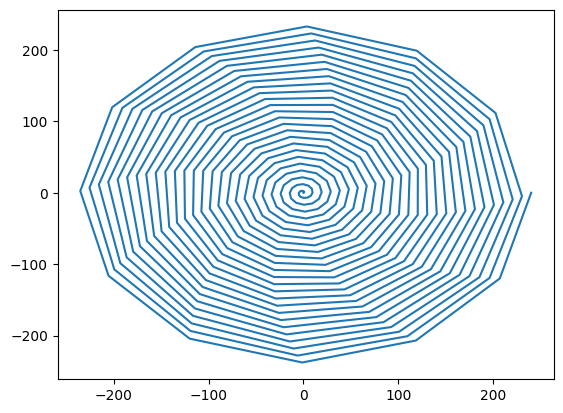

In [26]:
plt.plot(rec[:,0], rec[:,1])

In [8]:
for val in pm:
    print(val)

[914   0]
[ 955 -803]
[1027 -714]
[1126 -605]
[1244 -499]
[1376 -408]
[1520 -333]
[1671 -274]
[1829 -228]
[1795  479]
[1786  490]
[1801  489]
[1840  474]
[1903  449]
[1985  416]
[2086  379]
[2203  341]
[2332  305]
[2473  272]
[2624  242]
[2782  215]
[2946  191]
[3117  170]
[3292  153]
[3471  137]
